## Water Pollution and Disease Project

## About Dataset
#### This dataset shows how water pollution relates to waterborne diseases globally. It contains water quality measures, pollution data, disease statistics, and socio-economic factors. The data covers various countries and regions from 2000-2024.

It covers key factors such as contaminant levels, access to clean water, bacterial presence, water treatment methods, sanitation coverage, and the incidence of diseases like diarrhea, cholera, and typhoid. Additionally, it incorporates socio-economic variables such as GDP per capita, urbanization rate, and healthcare access, which help assess the broader impact of water pollution on communities.

#### Summary of Features in the Dataset
* country : Country where data was recorded
* region : Geographical region (e.g., Africa, Asia, Europe)
* year : Year of measurement
* water_source_type : Type of water source (river, lake, etc.)
* contaminant_level_(ppm) : Total contaminants in parts per million
* ph_level : Water pH value
* turbidity_(ntu) : Water cloudiness measurement
* dissolved_oxygen_(mg/l) : Oxygen content in water
* nitrate_level_(mg/l) : Nitrate concentration
* lead_concentration_(µg/l) : Lead content in water
* bacteria_count_(cfu/ml) : Bacteria measurement
* water_treatment_method : Method used to treat water
* access_to_clean_water_(%_of_population) : Clean water access percentage
* diarrheal_cases_per_100,000_people : Diarrhea incidence rate
* cholera_cases_per_100,000_people : Cholera incidence rate
* typhoid_cases_per_100,000_people : Typhoid incidence rate
* infant_mortality_rate_(per_1,000_live_births) : Infant mortality statistics
* gdp_per_capita_(usd) : GDP per person
* healthcare_access_index_(0-100) : Healthcare access measurement
* urbanization_rate_(%) : Urban population percentage
* sanitation_coverage_(%_of_population) : Sanitation access percentage
* rainfall_(mm_per_year) : Annual rainfall
* temperature_(°c) : Average temperature
* population_density_(people_per_km²) : Population per square kilometer

### Imported Necessary Library

In [19]:
# First, install required packages
# !pip install numpy pandas matplotlib seaborn scikit-learn

# Then import them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from xgboost import XGBRegressor

### Imported Dataset of water pollution and disease

In [3]:
# Load the water pollution dataset
# Assuming the dataset is in a CSV file named 'water_pollution.csv'
df = pd.read_csv('water_pollution_disease.csv')
print("Dataset loaded successfully!")
    

Dataset loaded successfully!


In [4]:
df

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Nigeria,East,2002,Tap,2.82,7.40,4.43,9.69,37.58,18.52,...,28,56,73.77,21255,75.34,15.22,53.06,264,31.64,882
2996,Nigeria,North,2019,Lake,8.13,8.33,4.77,7.62,38.05,16.98,...,34,34,71.11,79148,6.91,22.89,78.45,2699,33.21,67
2997,USA,South,2009,Pond,1.18,6.76,4.75,7.07,36.13,7.99,...,49,9,96.63,48569,86.17,85.89,47.38,1052,11.57,643
2998,Pakistan,South,2009,Pond,7.56,6.12,3.49,8.93,25.30,19.86,...,33,90,20.71,49099,20.50,20.78,23.34,369,14.69,643


#  Data Cleaning and Preparation

#### Missing values analysis

In [5]:
df.isnull().sum()

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

#### Drop rows with any missing values

In [6]:
df.dropna(inplace=True)

### Select only the columns required for WHO water quality guidelines assessment

In [7]:

who_guideline_columns = [
    'pH Level',                    # WHO recommends pH 6.5-8.5
    'Turbidity (NTU)',             # WHO guideline: <1 NTU
    'Nitrate Level (mg/L)',        # WHO standard: <10 mg/L
    'Lead Concentration (µg/L)',   # WHO guideline: <10 µg/L
    'Dissolved Oxygen (mg/L)',     # WHO recommendation for aquatic life: >5 mg/L
]

# Create a subset of the data with only the required columns
water_quality_data = df[who_guideline_columns]

# Define a function to test if water meets WHO guidelines
def meets_who_guidelines(row):
    return (
        6.5 <= row['pH Level'] <= 8.5 and
        row['Turbidity (NTU)'] < 1 and
        row['Nitrate Level (mg/L)'] < 10 and
        row['Lead Concentration (µg/L)'] < 10 and  # Using WHO's stricter 10 µg/L guideline
        row['Dissolved Oxygen (mg/L)'] > 5 
    )

# Apply the function to create a new column indicating if water meets WHO guidelines
df['Meets_WHO_Guidelines'] = df.apply(meets_who_guidelines, axis=1)

# Calculate the percentage of samples that meet WHO guidelines
who_compliance_percentage = (df['Meets_WHO_Guidelines'].sum() / len(df)) * 100
print(f"Percentage of water samples meeting WHO guidelines: {who_compliance_percentage:.2f}%")

# Create a subset for further analysis if needed
compliant_samples = df[df['Meets_WHO_Guidelines'] == True]
non_compliant_samples = df[df['Meets_WHO_Guidelines'] == False]


Percentage of water samples meeting WHO guidelines: 0.98%


### Define water refinement rule

In [8]:
# Define water refinement rule
def is_refined(row):
    # Parameters based on World Health Organization (WHO) guidelines for drinking water quality
    return int(
        6.5 <= row['pH Level'] <= 8.5 and  # WHO recommends pH 6.5-8.5
        row['Turbidity (NTU)'] < 1 and     # WHO guideline: <1 NTU
        row['Nitrate Level (mg/L)'] < 10 and  # WHO standard: <10 mg/L
        row['Lead Concentration (µg/L)'] < 10 and  # WHO guideline: <10 µg/L (corrected from EPA's 15 µg/L)
        row['Dissolved Oxygen (mg/L)'] > 5 # WHO recommendation for aquatic life
    )
df['Refined Water'] = df.apply(is_refined, axis=1)

## Prepare data for model training
### Define features and target variable
### Only use the columns that are used in the is_refined function

In [9]:
features = ['pH Level', 'Turbidity (NTU)', 'Nitrate Level (mg/L)', 
           'Lead Concentration (µg/L)', 'Dissolved Oxygen (mg/L)', 
]
X = df[features]
y = df['Refined Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest using 'Refined Water' as the target variable
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Also evaluate model on WHO guidelines compliance
who_pred = rf.predict(X_test)
print("\nModel performance for predicting WHO guideline compliance:")
print("Accuracy:", accuracy_score(y_test, who_pred))


Accuracy: 0.9955621301775148
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       671
           1       1.00      0.40      0.57         5

    accuracy                           1.00       676
   macro avg       1.00      0.70      0.78       676
weighted avg       1.00      1.00      0.99       676

Confusion Matrix:
 [[671   0]
 [  3   2]]

Model performance for predicting WHO guideline compliance:
Accuracy: 0.9955621301775148


## Save the trained model to a file
### This pickle file will be used by our Flask web application to make predictions
### The model is saved after training to avoid retraining it every time the web app needs to make a prediction
### This approach improves efficiency and ensures consistent predictions across the application


In [10]:
import pickle
pickle.dump(rf, open('rf_model.pkl', 'wb'))

### Visualize the confusion matrix

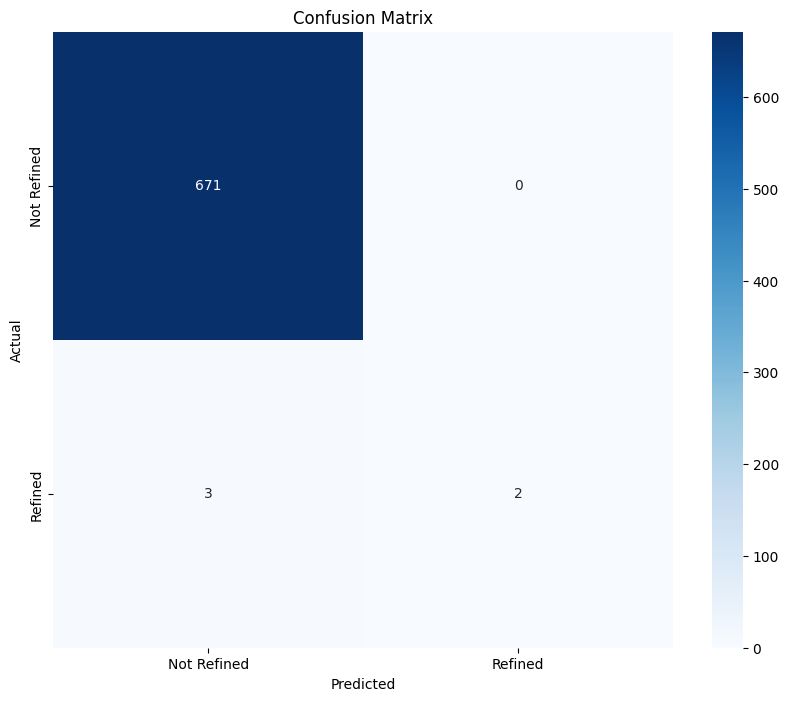

In [11]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Refined', 'Refined'],
            yticklabels=['Not Refined', 'Refined'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature importance visualization

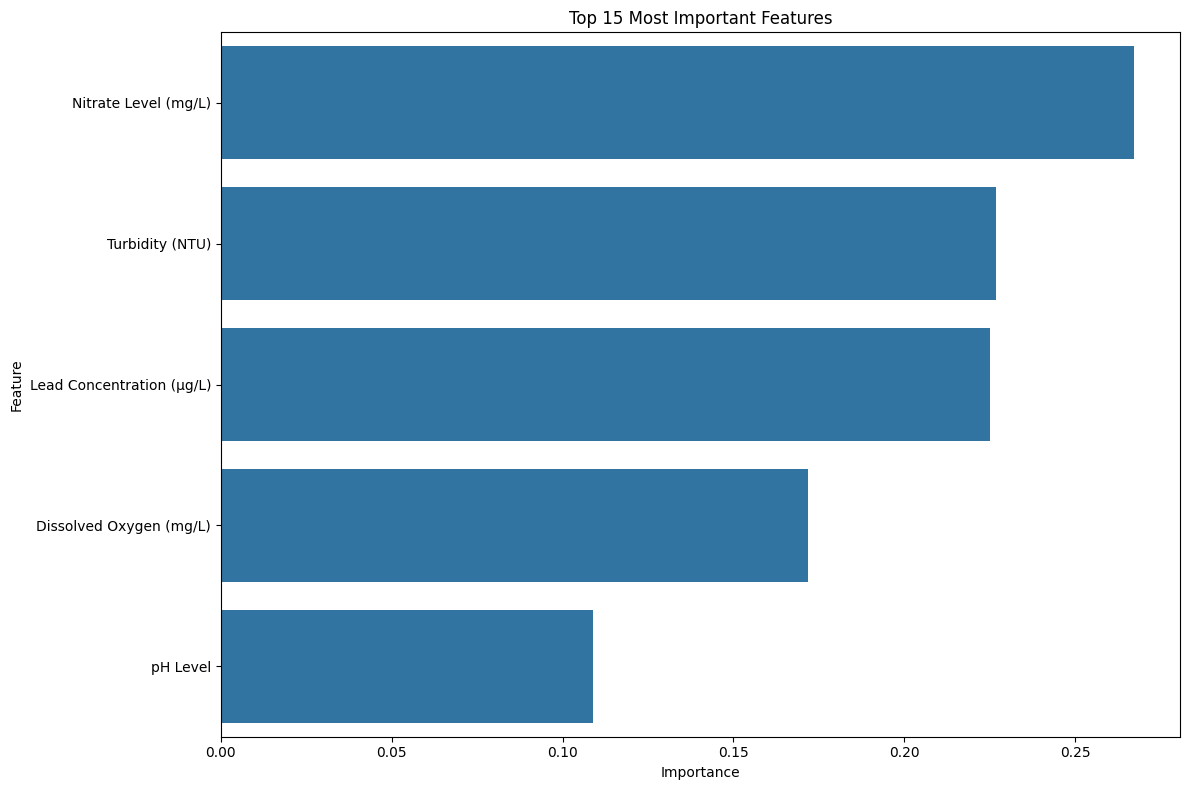

In [12]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

### Distribution of refined vs non-refined water

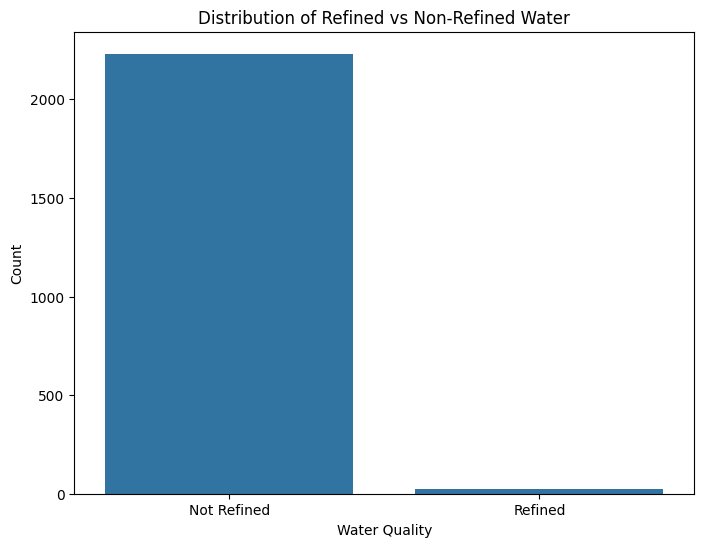

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.xticks([0, 1], ['Not Refined', 'Refined'])
plt.title('Distribution of Refined vs Non-Refined Water')
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.show()


#  Water Refinement Process

### Water Refinement Methods and Parameters
### Define a function to recommend water refinement methods based on contaminant levels
    Recommends appropriate water refinement methods based on contaminant levels and other parametersParameters:
    water_data (DataFrame): DataFrame containing water quality parameters
    Returns:
    DataFrame: Original data with recommended refinement methods and parameters

In [13]:

# Summary of water refinement methods and their applications
# This dictionary contains detailed information about each refinement method
refinement_methods = {
    'Reverse Osmosis': {
        'Description': 'Uses a semipermeable membrane to remove ions, molecules, and larger particles from water',
        'Best for': 'High levels of dissolved solids, heavy metals, and most contaminants',
        'Parameters': 'Pressure: 60-80 psi, Membrane pore size: 0.0001 micron',
        'Efficiency': '95-99% contaminant removal',
        'When to use': 'When contaminant levels exceed 5.0 ppm or for comprehensive purification'
    },
    'Ion Exchange': {
        'Description': 'Exchanges unwanted dissolved ions with similarly charged ions',
        'Best for': 'Hard water, heavy metals, and specific ionic contaminants',
        'Parameters': 'Resin type depends on target ions, Flow rate: 8-10 gpm/ft³',
        'Efficiency': '85-95% ion removal',
        'When to use': 'When heavy metal concentration exceeds 0.5 ppm or for hard water treatment'
    },
    'UV Disinfection': {
        'Description': 'Uses ultraviolet light to kill or inactivate microorganisms',
        'Best for': 'Bacterial and viral contamination',
        'Parameters': 'UV dose: 40 mJ/cm², Contact time: 8-10 seconds',
        'Efficiency': '99.9% pathogen reduction',
        'When to use': 'When bacterial count exceeds 500 or for any water source with microbial risk'
    },
    'Chlorination': {
        'Description': 'Adds chlorine to water to kill bacteria and other microbes',
        'Best for': 'Microbial contamination, especially in large water systems',
        'Parameters': 'Chlorine dose: 2-4 mg/L, Contact time: 30 minutes',
        'Efficiency': '99.9% bacteria reduction',
        'When to use': 'For long-term disinfection or when UV treatment is not available'
    },
    'Coagulation/Flocculation': {
        'Description': 'Adds chemicals to form larger particles from small suspended particles',
        'Best for': 'Turbid water with suspended particles',
        'Parameters': 'Coagulant type and dose varies by water quality, Mixing time: 1-3 minutes',
        'Efficiency': '85-95% turbidity reduction',
        'When to use': 'When turbidity exceeds 5 NTU or for surface water sources'
    },
    'Filtration': {
        'Description': 'Passes water through media to remove particles',
        'Best for': 'Removing suspended solids and some dissolved contaminants',
        'Parameters': 'Media type: Sand, activated carbon, etc., Filtration rate: 2-4 gpm/ft²',
        'Efficiency': '70-95% particle removal depending on filter type',
        'When to use': 'As a pre-treatment step or for moderately contaminated water'
    },
    'Activated Carbon Filtration': {
        'Description': 'Uses activated carbon to adsorb contaminants',
        'Best for': 'Organic compounds, chlorine, and some chemicals',
        'Parameters': 'Carbon type: Granular or block, Contact time: 10-15 minutes',
        'Efficiency': '80-95% organic compound removal',
        'When to use': 'For lake or pond water sources or to improve taste and odor'
    },
    'Water Softening': {
        'Description': 'Removes calcium and magnesium ions that cause water hardness',
        'Best for': 'Hard water from wells or mineral-rich sources',
        'Parameters': 'Salt dosage: 8-10 lbs/ft³ of resin, Regeneration cycle: 2-3 days',
        'Efficiency': '90-95% hardness reduction',
        'When to use': 'For well water or when water hardness exceeds recommended levels'
    }
}

# Display summary of refinement methods
print("\nSummary of Water Refinement Methods:")
for method, details in refinement_methods.items():
    print(f"\n{method}:")
    for key, value in details.items():
        print(f"  {key}: {value}")



Summary of Water Refinement Methods:

Reverse Osmosis:
  Description: Uses a semipermeable membrane to remove ions, molecules, and larger particles from water
  Best for: High levels of dissolved solids, heavy metals, and most contaminants
  Parameters: Pressure: 60-80 psi, Membrane pore size: 0.0001 micron
  Efficiency: 95-99% contaminant removal
  When to use: When contaminant levels exceed 5.0 ppm or for comprehensive purification

Ion Exchange:
  Description: Exchanges unwanted dissolved ions with similarly charged ions
  Best for: Hard water, heavy metals, and specific ionic contaminants
  Parameters: Resin type depends on target ions, Flow rate: 8-10 gpm/ft³
  Efficiency: 85-95% ion removal
  When to use: When heavy metal concentration exceeds 0.5 ppm or for hard water treatment

UV Disinfection:
  Description: Uses ultraviolet light to kill or inactivate microorganisms
  Best for: Bacterial and viral contamination
  Parameters: UV dose: 40 mJ/cm², Contact time: 8-10 seconds
  E

Predict Infant Mortality Rate using water and socioeconomic factors.

Estimate Cholera/Typhoid/Diarrheal Cases based on water quality and environmental conditions.

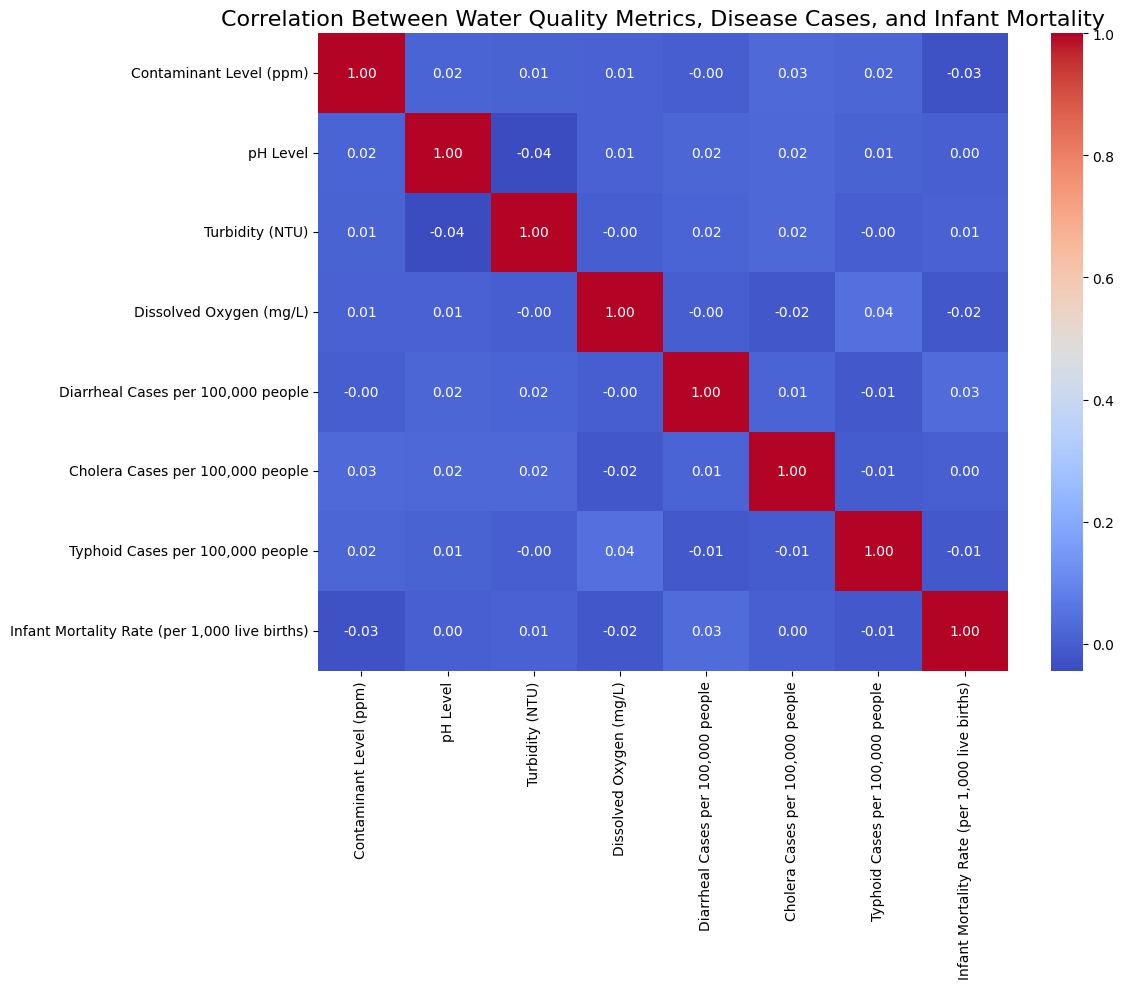


Predicting Diarrheal Cases per 100,000 people


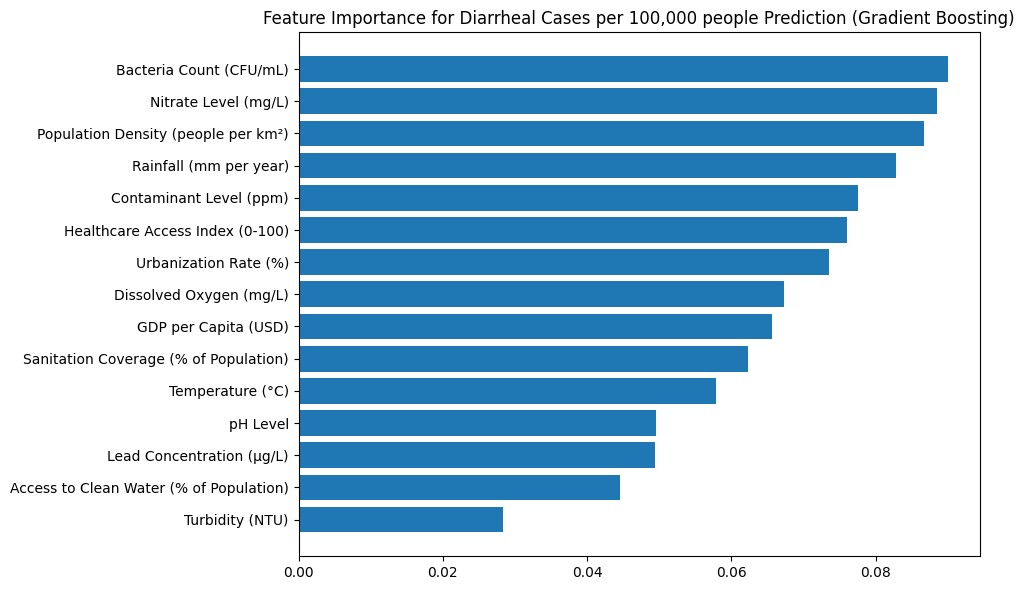


Best model: Gradient Boosting
RMSE: 145.91
R² Score: -0.02


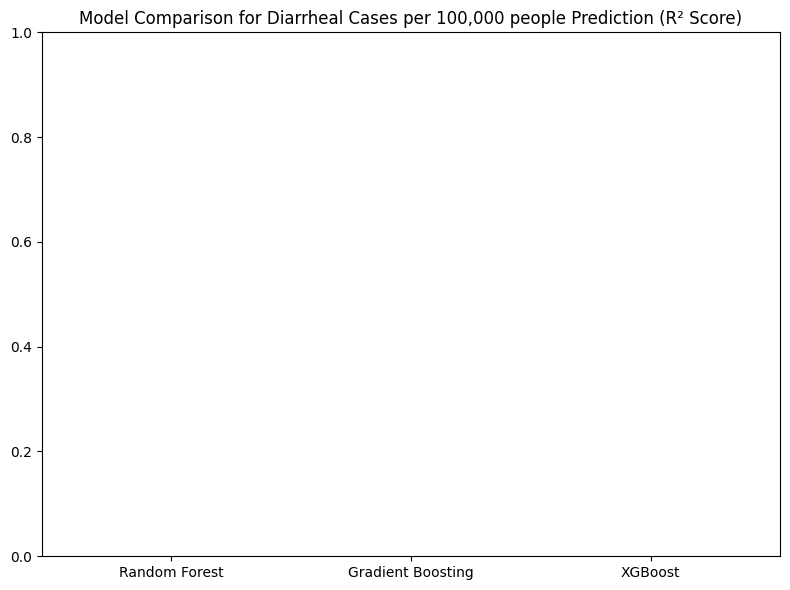


Predicting Cholera Cases per 100,000 people


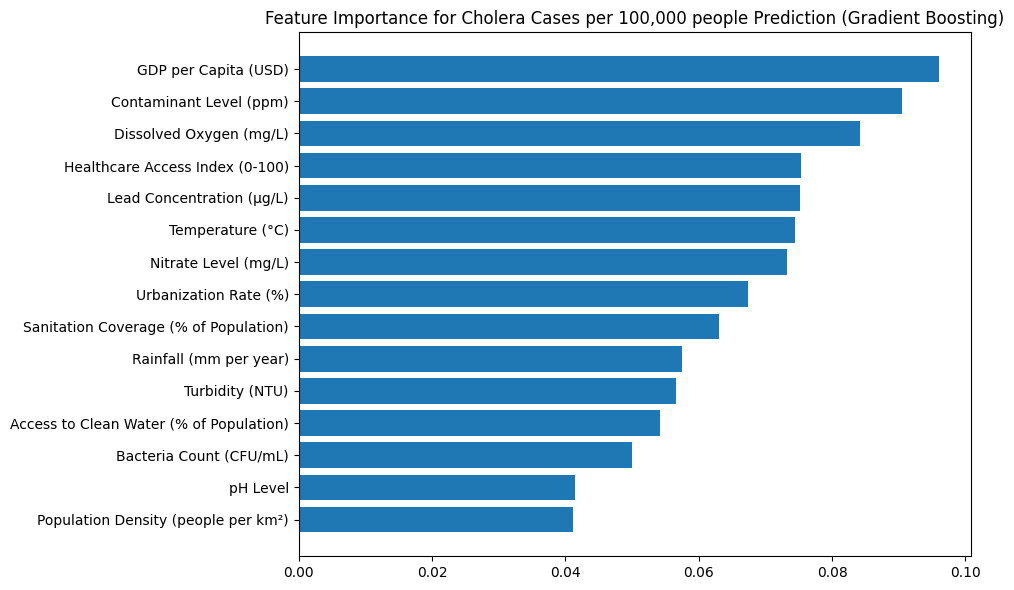


Best model: Gradient Boosting
RMSE: 14.40
R² Score: -0.00


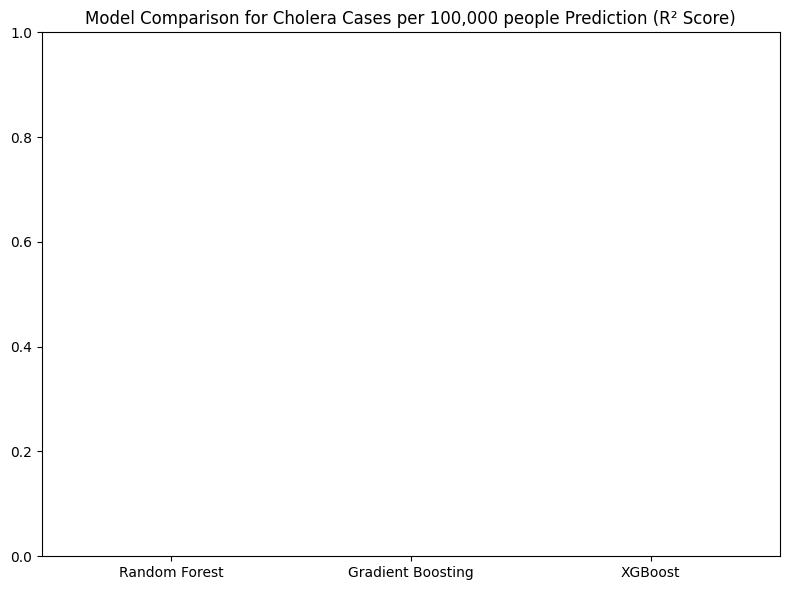


Predicting Typhoid Cases per 100,000 people


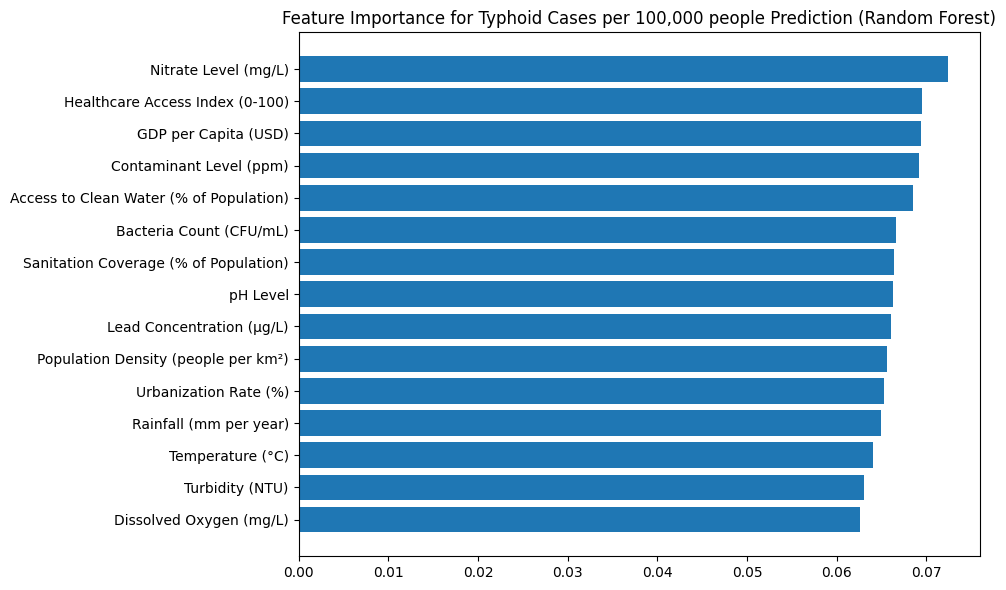


Best model: Random Forest
RMSE: 29.09
R² Score: -0.02


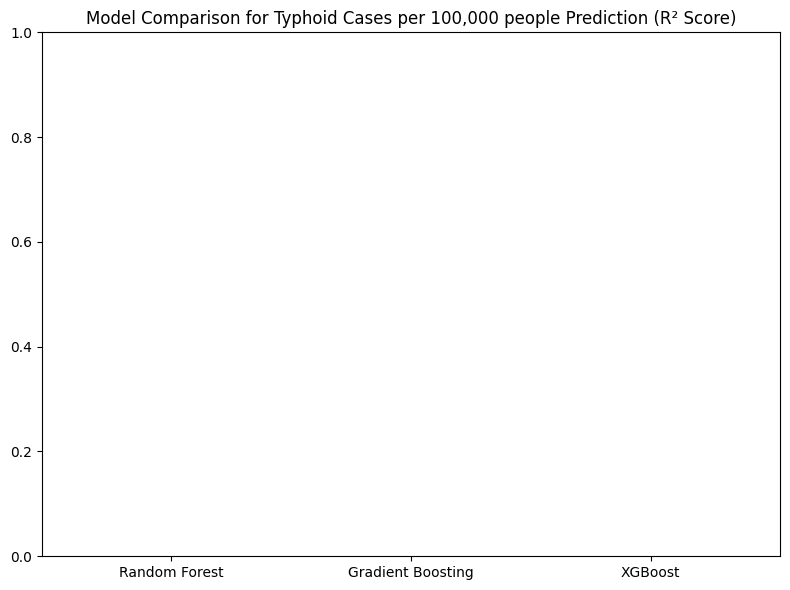


Predicting Infant Mortality Rate (per 1,000 live births)


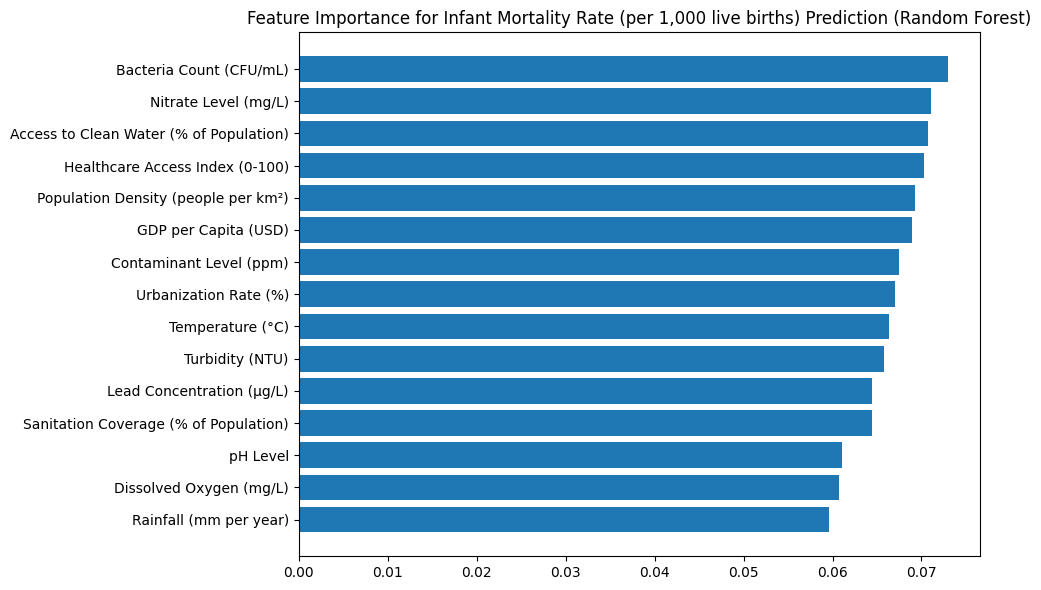


Best model: Random Forest
RMSE: 28.61
R² Score: -0.05


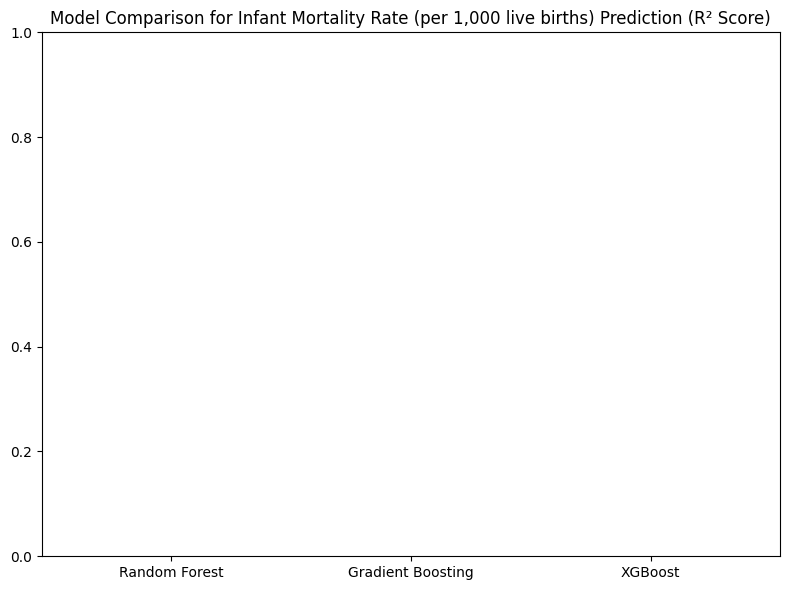


Key predictors for Diarrheal Cases per 100,000 people:
- Nitrate Level (mg/L)


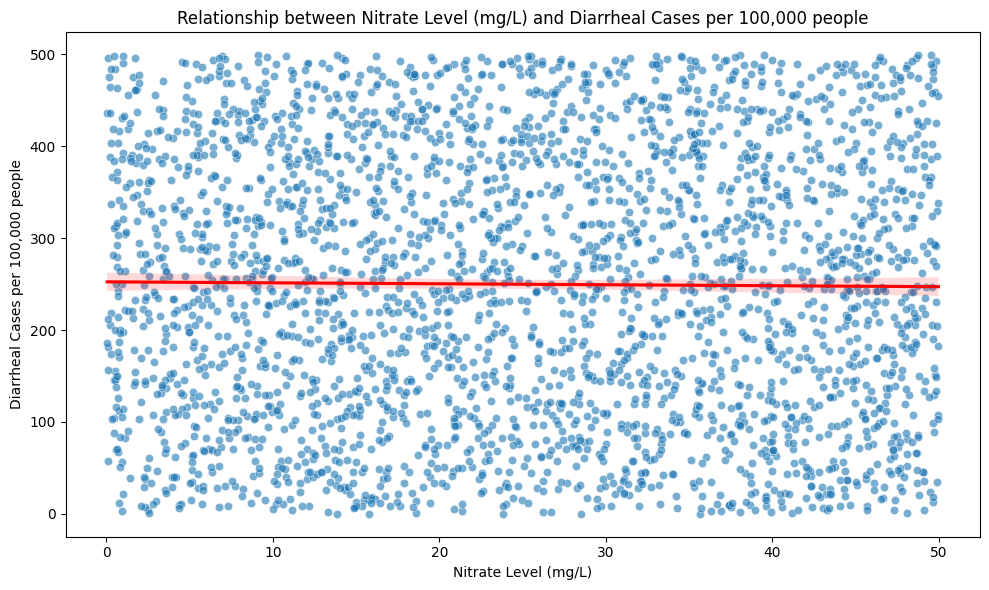

- Bacteria Count (CFU/mL)


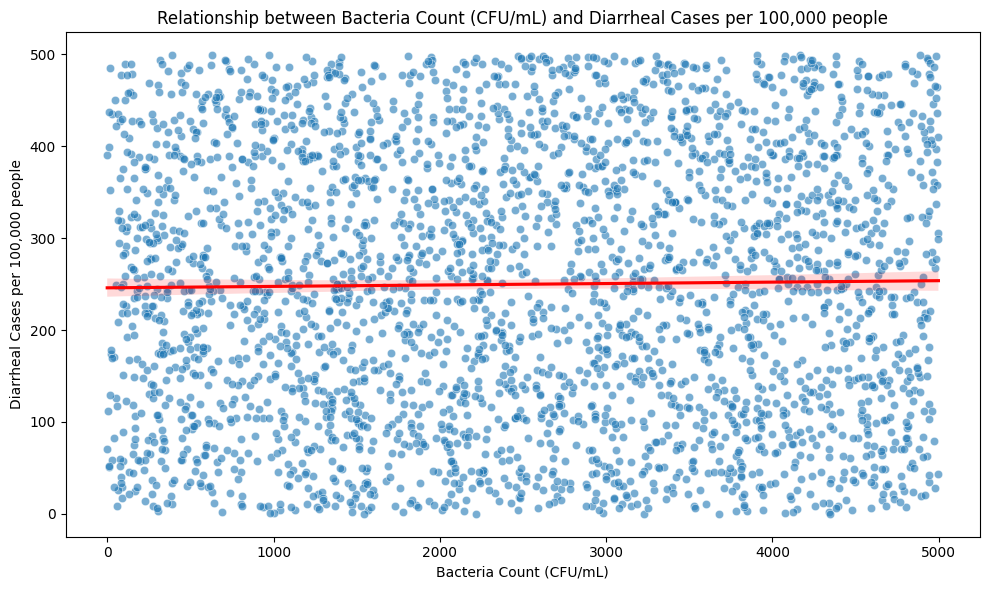


Key predictors for Cholera Cases per 100,000 people:
- Contaminant Level (ppm)


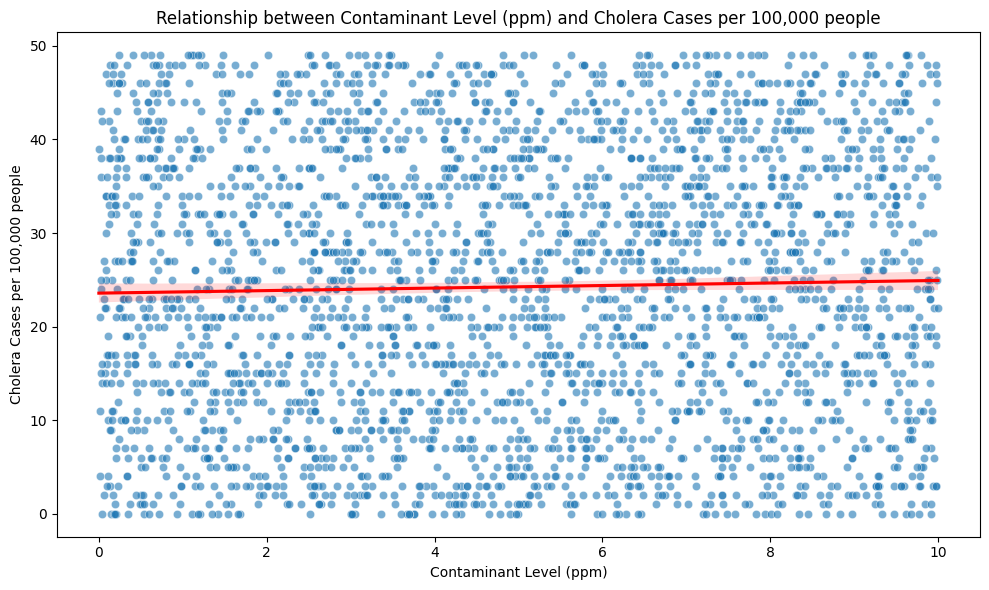

- GDP per Capita (USD)


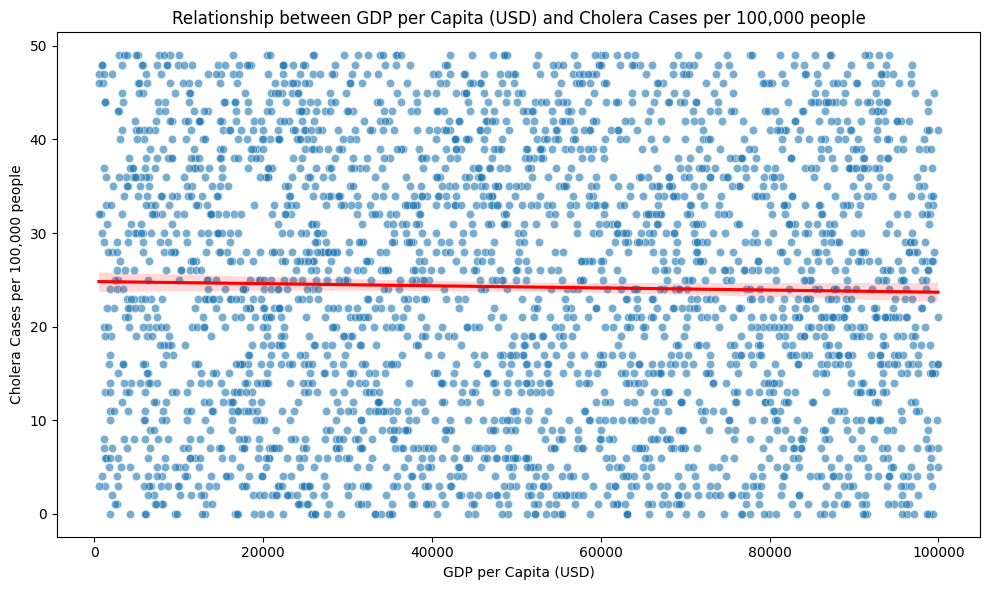


Key predictors for Typhoid Cases per 100,000 people:
- Healthcare Access Index (0-100)


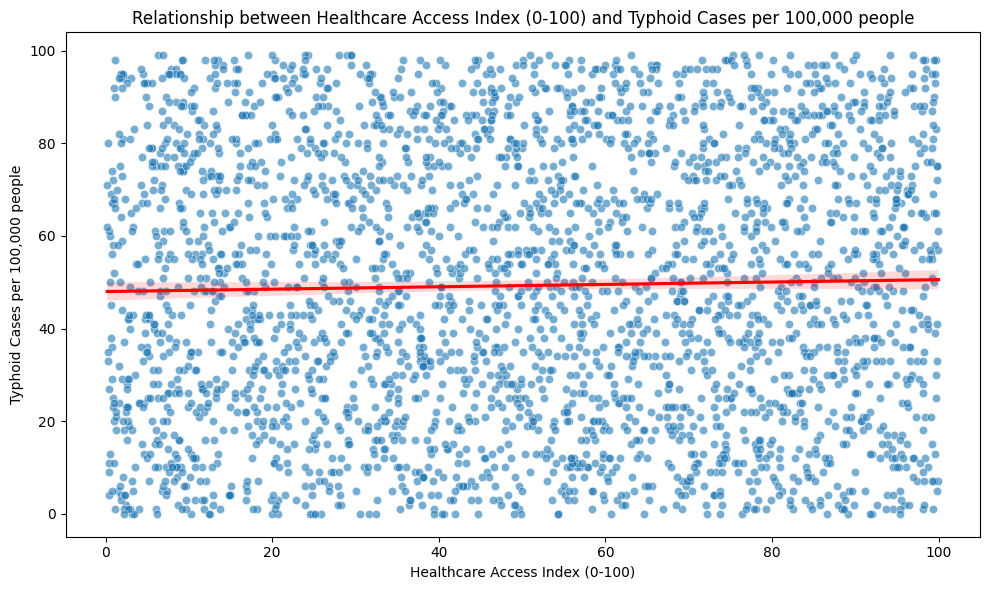

- Nitrate Level (mg/L)


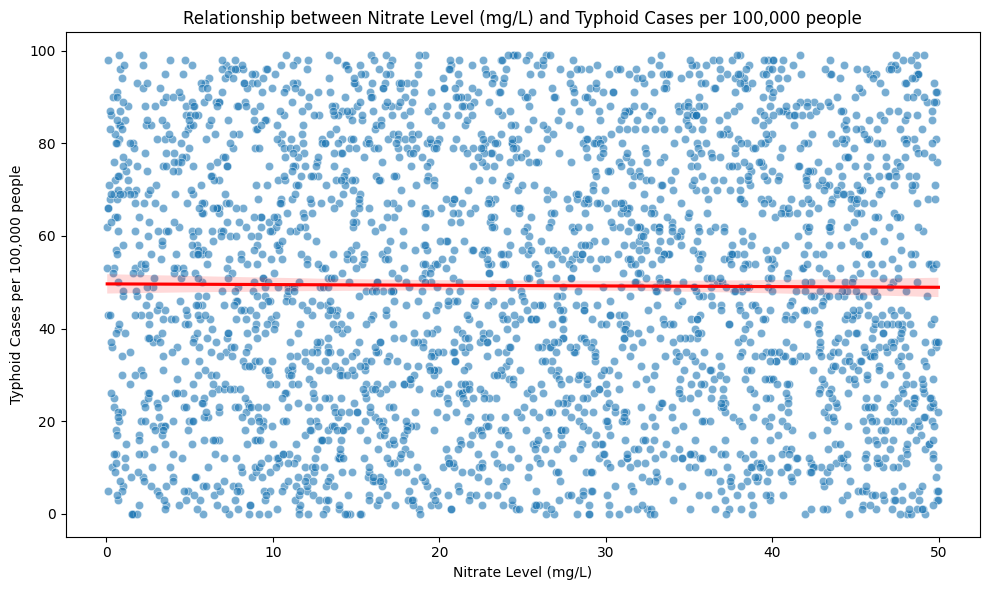


Key predictors for Infant Mortality Rate (per 1,000 live births):
- Nitrate Level (mg/L)


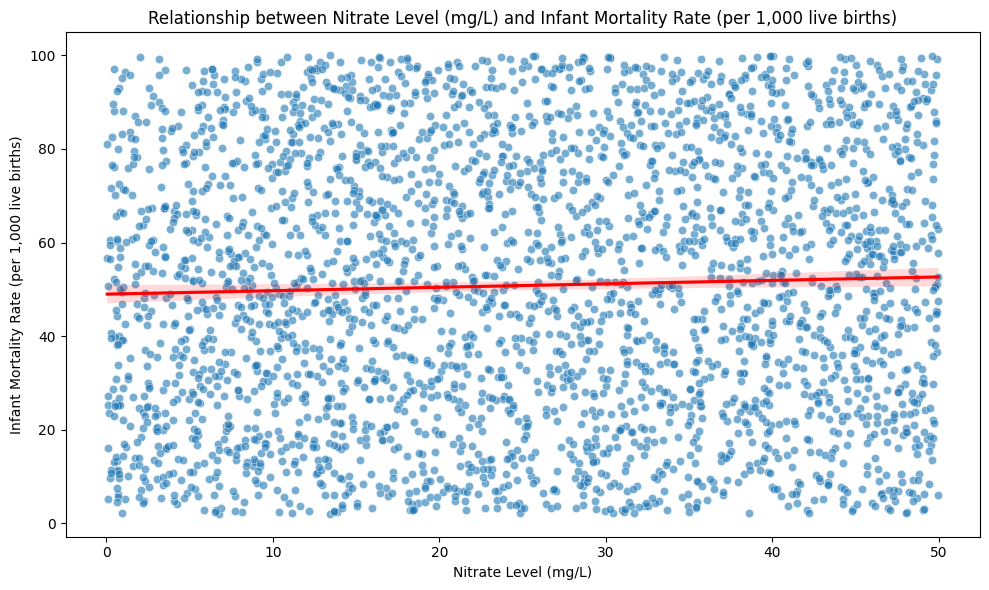

- Bacteria Count (CFU/mL)


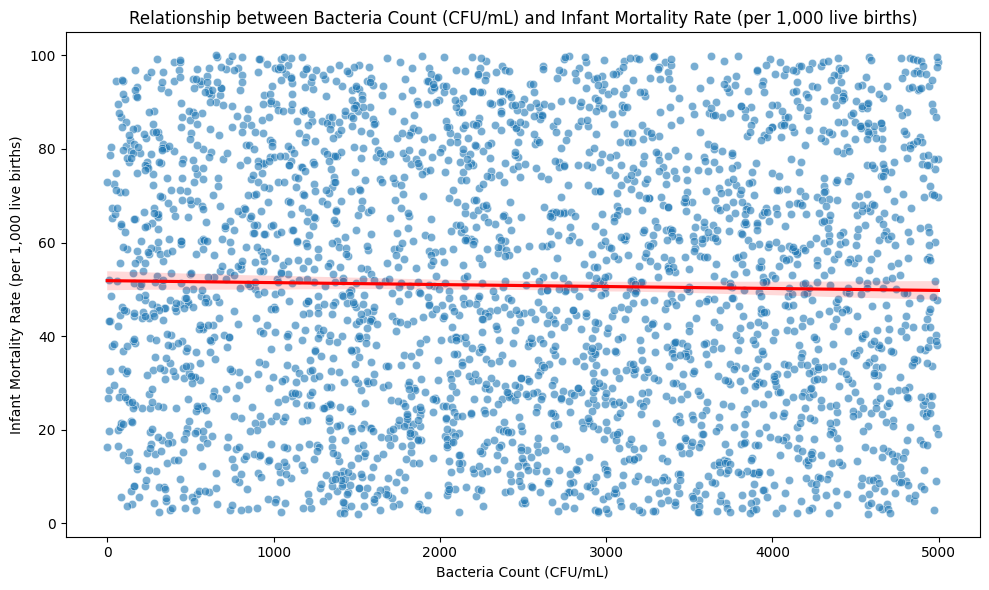

In [ ]:
# Create a more comprehensive model to predict waterborne disease cases and infant mortality
# Focus on Cholera, Typhoid, Diarrheal diseases, and Infant Mortality based on water quality and environmental factors

# Import necessary libraries



# First, let's examine the correlation between water quality metrics and disease cases
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 
                         'Dissolved Oxygen (mg/L)',
                         'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people', 
                         'Typhoid Cases per 100,000 people', 'Infant Mortality Rate (per 1,000 live births)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Water Quality Metrics, Disease Cases, and Infant Mortality', fontsize=16)
plt.tight_layout()
plt.show()

# Create a function to build and evaluate disease prediction models
def build_disease_prediction_model(target_disease, features):
    # Prepare the data
    X = df[features]
    y = df[target_disease]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create and train multiple models
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'model': model,
            'rmse': rmse,
            'r2': r2,
            'feature_importance': model.feature_importances_
        }
    
    # Find the best model
    best_model_name = min(results, key=lambda x: results[x]['rmse'])
    
    # Plot feature importance for the best model
    plt.figure(figsize=(10, 6))
    feature_importance = results[best_model_name]['feature_importance']
    sorted_idx = np.argsort(feature_importance)
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
    plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
    plt.title(f'Feature Importance for {target_disease} Prediction ({best_model_name})')
    plt.tight_layout()
    plt.show()
    
    return results, best_model_name

# Define comprehensive features for disease prediction
water_quality_features = [
    'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 
    'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)',
    'Bacteria Count (CFU/mL)'
]

environmental_features = [
    'Temperature (°C)', 'Rainfall (mm per year)', 'Population Density (people per km²)'
]

socioeconomic_features = [
    'GDP per Capita (USD)', 'Healthcare Access Index (0-100)', 
    'Urbanization Rate (%)', 'Sanitation Coverage (% of Population)',
    'Access to Clean Water (% of Population)'
]

# Combine all features
all_features = water_quality_features + environmental_features + socioeconomic_features

# Build models for each disease and infant mortality
diseases = ['Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people', 
           'Typhoid Cases per 100,000 people', 'Infant Mortality Rate (per 1,000 live births)']
best_models = {}

for disease in diseases:
    print(f"\n{'='*50}")
    print(f"Predicting {disease}")
    print(f"{'='*50}")
    
    results, best_model = build_disease_prediction_model(disease, all_features)
    best_models[disease] = results[best_model]
    
    print(f"\nBest model: {best_model}")
    print(f"RMSE: {results[best_model]['rmse']:.2f}")
    print(f"R² Score: {results[best_model]['r2']:.2f}")
    
    # Compare all models
    model_names = list(results.keys())
    rmse_values = [results[model]['rmse'] for model in model_names]
    r2_values = [results[model]['r2'] for model in model_names]
    
    plt.figure(figsize=(8, 6))
    plt.bar(model_names, r2_values)
    plt.title(f'Model Comparison for {disease} Prediction (R² Score)')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Create a function to visualize the relationship between key predictors and disease cases
def plot_predictor_disease_relationship(predictor, disease):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[predictor], y=df[disease], alpha=0.6)
    
    # Add regression line
    sns.regplot(x=df[predictor], y=df[disease], scatter=False, color='red')
    
    plt.title(f'Relationship between {predictor} and {disease}')
    plt.xlabel(predictor)
    plt.ylabel(disease)
    plt.tight_layout()
    plt.show()

# Visualize relationships for the most important predictors
for disease in diseases:
    # Get the top 2 most important features for this disease
    feature_importance = best_models[disease]['feature_importance']
    top_features_idx = np.argsort(feature_importance)[-2:]
    top_features = [all_features[i] for i in top_features_idx]
    
    print(f"\nKey predictors for {disease}:")
    for feature in top_features:
        print(f"- {feature}")
        plot_predictor_disease_relationship(feature, disease)
